In [3]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
from smac import Scenario
from smac import BlackBoxFacade as BBFacade
from smac import HyperparameterOptimizationFacade as HPOFacade
from smac.initial_design.sobol_design import SobolInitialDesign
from smac.acquisition.function.expected_improvement import EI
from smac.acquisition.maximizer.local_and_random_search import LocalAndSortedRandomSearch
from smac.random_design.probability_design import ProbabilityRandomDesign
from smac.intensifier.intensifier import Intensifier
from smac.runhistory.encoder.encoder import RunHistoryEncoder
from ConfigSpace import ConfigurationSpace, Float
from smac.model.abstract_model import AbstractModel
from smac.callback import Callback
import random
import json
import json

seed = 0
ex_name = 'values_test'

cs = ConfigurationSpace(seed=seed)
for i in range(6):
    x = Float(f"{i:02}", (0.01, 1))
    cs.add_hyperparameters([x])

# Scenario object specifying the optimization "environment"
scenario = Scenario(cs,
                    name=ex_name,
                    deterministic=True,
                    n_trials=15)


def obj_function(config, seed=seed):
    return random.randint(1, 100)


class SurrogateModel(AbstractModel):
    def __init__(self, configspace):
        super().__init__(configspace)

    def train(self, X: np.ndarray, y: np.ndarray):
        print('Train: ', X.shape)
        print(X)
        print('Inverse scale of values:')
        print(X * (1 - 0.01) + 0.01)
        print(y)

    def predict(self, x: np.ndarray, covariance_type: str | None = "diagonal", runs: int = 25):
        print('Predict')
        print(x)

    def predict_marginalized_over_instances(self, X: np.ndarray):
        return self.predict(X)


sur_model = SurrogateModel(cs)


class SaveAngleCallback(Callback):
    def __init__(self, path):
        self.metrics_dict = {}
        self.trial_counter = 0
        self.path = path
        super().__init__()

    def on_tell_start(self, smbo, info, value):
        self.trial_counter += 1

        self.metrics_dict[self.trial_counter] = {
            'value': float(value.cost),
        }

        with open(f'smac3_output/{self.path}/metrics.json', 'w') as file:
            json.dump(self.metrics_dict, file)


# Now we use SMAC to find the best hyperparameters
smac = HPOFacade(
    scenario=scenario,
    target_function=obj_function,
    model=sur_model,
    acquisition_function=EI(xi=0.0),
    acquisition_maximizer=LocalAndSortedRandomSearch(
        configspace=scenario.configspace,
        challengers=1000,
        local_search_iterations=10,
        #n_steps_plateau_walk=2,
        #max_steps=5,
        seed=scenario.seed,
    ),
    initial_design=SobolInitialDesign(
        scenario=scenario,
        n_configs=10,
        max_ratio=1,
        seed=scenario.seed,
    ),
    random_design=ProbabilityRandomDesign(seed=scenario.seed, probability=0.08447232371720552),
    intensifier=Intensifier(
        scenario=scenario,
        max_config_calls=3,
        max_incumbents=20,
    ),
    runhistory_encoder=RunHistoryEncoder(scenario),
    overwrite=True,
    #logging_level=0,
    callbacks=[SaveAngleCallback(f'{ex_name}/{seed}')]
)

incumbent = smac.optimize()

[INFO][abstract_initial_design.py:82] Using `n_configs` and ignoring `n_configs_per_hyperparameter`.
[INFO][abstract_initial_design.py:147] Using 10 initial design configurations and 0 additional configurations.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[INFO][abstract_intensifier.py:515] Added config f1a50c as new incumbent because there are no incumbents yet.
[INFO][abstract_intensifier.py:590] Added config 4664e3 and rejected config f1a50c as incumbent because it is not better than the incumbents on 1 instances:
[INFO][configspace.py:175] --- 00: 0.27420973585918546 -> 0.6450799030438066
[INFO][configspace.py:175] --- 01: 0.6243590484932066 -> 0.11624875599518418
[INFO][configspace.py:175] --- 02: 0.11643280289135872 -> 0.989343415023759
[INFO][configspace.py:175] --- 03: 0.21965847463347019 -> 0.8221353987138719
[INFO][configspace.py:175] --- 04: 0.8627264361735434 -> 0.3980322583485395
[INFO][configspace.py:175] --- 05: 0.5005605065450072 

TypeError: cannot unpack non-iterable NoneType object

In [44]:
from smac.initial_design.sobol_design import SobolInitialDesign
from ConfigSpace import ConfigurationSpace, Float, Configuration
from smac import Scenario
import numpy as np

seed = 0
ex_name = 'baseline'

cs = ConfigurationSpace(seed=seed)
for i in range(60):
    x = Float(f"{i:02}", (0.01, 1))
    cs.add_hyperparameters([x])

scenario = Scenario(cs,
                    name=ex_name,
                    deterministic=True,
                    n_trials=1000)

initial_design = SobolInitialDesign(
    scenario=scenario,
    n_configs=100,
    max_ratio=1,
    seed=scenario.seed,
)

initial_configs = initial_design.select_configurations()

[INFO][abstract_initial_design.py:82] Using `n_configs` and ignoring `n_configs_per_hyperparameter`.
[INFO][abstract_initial_design.py:147] Using 100 initial design configurations and 0 additional configurations.


In [46]:
x_data_0 = np.array([cfg.get_array() for cfg in initial_configs])

In [48]:
for cfg in initial_configs:
    print(cfg)
    print(cfg.get_array())
    x = []
    for i in range(60):
        x_i = cfg[f"{i:02}"]
        x.append(x_i)
    print(x)
    break

Configuration(values={
  '00': 0.27420973585918546,
  '01': 0.6243590484932066,
  '02': 0.11643280289135872,
  '03': 0.21965847463347019,
  '04': 0.8627264361735434,
  '05': 0.5005605065450072,
  '06': 0.9603757594153285,
  '07': 0.9968127990048379,
  '08': 0.7744139964226633,
  '09': 0.7162562181800604,
  '10': 0.4635457644797862,
  '11': 0.8300952298939228,
  '12': 0.2285294520482421,
  '13': 0.10691652219742535,
  '14': 0.9422569867409766,
  '15': 0.7655022597406059,
  '16': 0.8993888268340379,
  '17': 0.5054875917360186,
  '18': 0.09620529341511427,
  '19': 0.7859911505691707,
  '20': 0.07723666784353554,
  '21': 0.5832429940160364,
  '22': 0.6857474525272846,
  '23': 0.6316609365679323,
  '24': 0.856844883216545,
  '25': 0.06783209595829248,
  '26': 0.06586779560893774,
  '27': 0.18919785446487367,
  '28': 0.4403730630222708,
  '29': 0.0787167344149202,
  '30': 0.4183268523029983,
  '31': 0.3844077898189425,
  '32': 0.6927523401845247,
  '33': 0.9464987995475531,
  '34': 0.6496283

In [25]:
x_data = []
for config in initial_configs:
    x = []
    for i in range(60):
        x_i = config[f"x_{i}"]
        x.append(x_i)
    x_data.append(x)

x_data = np.array(x_data).reshape(-1, 60)

In [26]:
def find_relationship(array1, array2):
    # Ensure both arrays have the same shape
    assert array1.shape == array2.shape, "Arrays must have the same shape."

    num_rows, num_cols = array1.shape
    permutation = np.zeros(num_rows, dtype=int)

    for i in range(num_rows):
        for j in range(num_rows):
            if np.array_equal(array1[i], array2[j]):
                permutation[i] = j
                break

    return permutation


relationship = find_relationship(x_data, x_data_0)
print("Relationship between arrays:")
print(relationship)

Relationship between arrays:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from src.sbo import SurrogateModel, Oracle
from src.models import DenseModelDropout
from src.dataloaders import BaselineDataLoader
from src.constants import INPUT_SHAPE, OUTPUT_SHAPE
import tensorflow as tf
import math
from ConfigSpace import ConfigurationSpace, Float

oracle = Oracle()
seed = 0


def p_norm(matrix, p=4):
    return tf.norm(matrix, ord=p)


cs = ConfigurationSpace(seed=seed)
for i in range(60):
    x = Float(f"{i:02}", (0.01, 1))
    cs.add_hyperparameters([x])

model = DenseModelDropout(name='BaselineDropout',
                          input_dim=INPUT_SHAPE,
                          output_dim=(math.prod(OUTPUT_SHAPE),),
                          is_mc_dropout=True)
data_loader = BaselineDataLoader('data/val_short.csv')
sur_model = SurrogateModel(cs, model, data_loader, p_norm, oracle)

In [3]:
from src.scaler import Scaler

scaler = Scaler()

x, _ = data_loader.load_data()
x = x.head(50)
x = x.to_numpy().reshape(50, -1)
x = scaler.scale(x, col_name="gripper_force")
sur_model = sur_model.train(x, 1)

In [4]:
x, _ = data_loader.load_data()
x = x.head(5)
x = x.to_numpy().reshape(5, -1)
x = scaler.scale(x, col_name="gripper_force")
sur_model.predict(x)

(10, 5)


(array([[410.10556],
        [404.84082],
        [403.8036 ],
        [421.40674],
        [406.07755]], dtype=float32),
 array([[37.614143],
        [43.591843],
        [43.298256],
        [97.44822 ],
        [94.04577 ]], dtype=float32))

In [8]:
import numpy as np

x = np.array([[0, 0], [2, 2], [4, 4]])
x_repeated = np.repeat(x[np.newaxis, ...], 3, axis=0)
x_repeated = np.reshape(x_repeated, (-1, x.shape[-1]))
x_repeated

array([[0, 0],
       [2, 2],
       [4, 4],
       [0, 0],
       [2, 2],
       [4, 4],
       [0, 0],
       [2, 2],
       [4, 4]])

In [10]:
x.shape, x_repeated.shape

((3, 2), (9, 2))

In [17]:
import numpy as np

predictions = np.random.rand(3, 2, 1, 1)
predictions = np.array(predictions).T
predictions.shape

(1, 1, 2, 3)

In [4]:
import tensorflow as tf
import numpy as np
matrix = np.random.rand(10, 1)

print(-matrix)

[[-0.57662744]
 [-0.41797771]
 [-0.97827837]
 [-0.51830319]
 [-0.3405913 ]
 [-0.5228424 ]
 [-0.6247712 ]
 [-0.77262545]
 [-0.03864924]
 [-0.16554195]]


In [3]:
m = np.random.rand(10, 1)
std = np.random.rand(10, 1)
beta_t = 2 * np.log((60 * 10**2) / 1)
print( -(m - np.sqrt(beta_t) * std))

[[ 0.11896365]
 [ 1.65253069]
 [ 2.41594245]
 [ 1.36088201]
 [ 2.39590948]
 [-0.74694025]
 [ 0.21672493]
 [ 3.32786256]
 [ 2.5905011 ]
 [ 2.07609252]]


In [3]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
from smac import Scenario
from smac import BlackBoxFacade as BBFacade
from smac import HyperparameterOptimizationFacade as HPOFacade
from smac.initial_design.sobol_design import SobolInitialDesign
from smac.acquisition.function.expected_improvement import EI
from smac.acquisition.maximizer.local_and_random_search import LocalAndSortedRandomSearch
from smac.random_design.probability_design import ProbabilityRandomDesign
from smac.intensifier.intensifier import Intensifier
from smac.runhistory.encoder.encoder import RunHistoryEncoder
from ConfigSpace import ConfigurationSpace, Float
from src.sbo import Oracle, SaveAngleCallback, SurrogateModel
from src.models import DenseModelDropout
from src.dataloaders import BaselineDataLoader
from src.constants import INPUT_SHAPE, OUTPUT_SHAPE
import tensorflow as tf
import math

oracle = Oracle()
seed = 0
ex_name = 'test'


def p_norm(matrix, p=4):
    return tf.norm(matrix, ord=p)


cs = ConfigurationSpace(seed=seed)
for i in range(60):
    x = Float(f"x_{i}", (0.01, 1))
    cs.add_hyperparameters([x])

# Scenario object specifying the optimization "environment"
scenario = Scenario(cs,
                    name=ex_name,
                    deterministic=True,
                    n_trials=150)


def obj_function(config, seed=seed):
    x = []
    for i in range(60):
        x_i = config[f"x_{i}"]
        x.append(x_i)
    y = oracle.simulate(x).reshape(-1)

    return np.linalg.norm(y, ord=4)


model = DenseModelDropout(name='BaselineDropout',
                          input_dim=INPUT_SHAPE,
                          output_dim=(math.prod(OUTPUT_SHAPE),),
                          is_mc_dropout=True)
data_loader = BaselineDataLoader('data/val_short.csv')
sur_model = SurrogateModel(cs, model, data_loader, p_norm, oracle)

# Now we use SMAC to find the best hyperparameters
smac = HPOFacade(
    scenario=scenario,
    target_function=obj_function,
    model=sur_model,
    acquisition_function=EI(xi=0.0),
    acquisition_maximizer=LocalAndSortedRandomSearch(
        configspace=scenario.configspace,
        challengers=1000,
        local_search_iterations=10,
        #n_steps_plateau_walk=2,
        #max_steps=5,
        seed=scenario.seed,
    ),
    initial_design=SobolInitialDesign(
        scenario=scenario,
        n_configs=100,
        max_ratio=1,
        seed=scenario.seed,
    ),
    random_design=ProbabilityRandomDesign(seed=scenario.seed, probability=0.08447232371720552),
    intensifier=Intensifier(
        scenario=scenario,
        max_config_calls=3,
        max_incumbents=20,
    ),
    runhistory_encoder=RunHistoryEncoder(scenario),
    overwrite=True,
    logging_level=0,
    callbacks=[SaveAngleCallback(oracle, f'{ex_name}/{seed}')]
)

incumbent = smac.optimize()

# Get cost of default configuration
default_cost = smac.validate(cs.get_default_configuration())
print(f"Default cost: {default_cost}")

# Let's calculate the cost of the incumbent
incumbent_cost = smac.validate(incumbent)
print(f"Incumbent cost: {incumbent_cost}")

[INFO][abstract_initial_design.py:82] Using `n_configs` and ignoring `n_configs_per_hyperparameter`.
[INFO][abstract_initial_design.py:147] Using 10 initial design configurations and 0 additional configurations.
[DEBUG][smbo.py:147] Calling ask...
[DEBUG][intensifier.py:156] Queue is empty:
[DEBUG][intensifier.py:161] --- No incumbent to intensify.
[DEBUG][config_selector.py:149] Search for the next configuration...
[DEBUG][intensifier.py:229] --- Added a new config bc35d6 to the queue.
[DEBUG][intensifier.py:237] Start finding a new challenger in the queue:
[DEBUG][abstract_intensifier.py:297] Added a new random seed 209652396 to the intensifier.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[DEBUG][intensifier.py:267] --- Yielding 1 trials to evaluate config bc35d6...
[DEBUG][smbo.py:162] ...and received a new trial.
[DEBUG][runhistory.py:1046] Update cost for config bc35d6.
[DEBUG][smbo.py:216] Tell method was called with cost 385.82373046875 (S

/home/i40/eismonta/surrogate_optimisation/src/sbo/surrogate_model.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_rows.drop(columns=['_merge'], inplace=True)


Epoch 1/20
3/3 [==============================] - 6s 1s/step - loss: -6.4552 - Loss_Weighted_MAE: 4.3217 - rmse: 36.5051 - mae: 35.0366 - rmse_max: 1.6473 - rmse_obj: 482.6452 - difference_max: 1.0172 - difference_obj: 482.6429 - tolerance_accuracy: 0.0033 - val_loss: -6.4648 - val_Loss_Weighted_MAE: 4.2880 - val_rmse: 36.4544 - val_mae: 34.9809 - val_rmse_max: 1.6196 - val_rmse_obj: 481.5870 - val_difference_max: 0.6775 - val_difference_obj: 481.5841 - val_tolerance_accuracy: 0.0040 - dropout_rate_layer_1: 0.1003 - dropout_rate_layer_2: 0.1003
Epoch 2/20
3/3 [==============================] - 4s 2s/step - loss: -6.4672 - Loss_Weighted_MAE: 4.3069 - rmse: 36.4551 - mae: 34.9735 - rmse_max: 1.7817 - rmse_obj: 481.4391 - difference_max: 1.1530 - difference_obj: 481.4369 - tolerance_accuracy: 0.0039 - val_loss: -6.4770 - val_Loss_Weighted_MAE: 4.2554 - val_rmse: 36.3403 - val_mae: 34.8368 - val_rmse_max: 1.8344 - val_rmse_obj: 478.8505 - val_difference_max: 1.0862 - val_difference_obj: 47

KeyboardInterrupt: 

In [10]:
import pandas as pd
from src.dataloaders import ImagesDataLoader

data_loader = ImagesDataLoader('data/val_short.csv')
x, y = data_loader.load_data()
pd.DataFrame(columns=x.columns.tolist() + y.columns.tolist())

,gripper_force_0,gripper_force_1,gripper_force_2,gripper_force_3,gripper_force_4,gripper_force_5,gripper_force_6,gripper_force_7,gripper_force_8,gripper_force_9,...,gripper_force_51,gripper_force_52,gripper_force_53,gripper_force_54,gripper_force_55,gripper_force_56,gripper_force_57,gripper_force_58,gripper_force_59,strain_field_matrix_path


In [24]:
existing_df = pd.DataFrame({
    'Column1': [1, 2, 3],
    'Column2': ['A', 'B', 'C']
})

# Sample DataFrame with new data, including duplicates (shape: (N, 3))
new_df = pd.DataFrame({
    'Column1': [3, 4, 5],
    'Column2': ['C', 'D', 'E']
})

df = existing_df.merge(new_df, how='outer', indicator=True, on=['Column1', 'Column2'])

df

,Column1,Column2,_merge
0,1,A,left_only
1,2,B,left_only
2,3,C,both
3,4,D,right_only
4,5,E,right_only


In [2]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
from ConfigSpace import Configuration, ConfigurationSpace, Float
from matplotlib import pyplot as plt

from smac import HyperparameterOptimizationFacade as HPOFacade
from smac import BlackBoxFacade as BBFacade
from smac import RunHistory, Scenario
from smac.runhistory.dataclasses import TrialInfo, TrialValue
from smac.intensifier.intensifier import Intensifier
from smac.initial_design.sobol_design import SobolInitialDesign

from smac.callback import Callback
from smac.runhistory import TrialInfo, TrialValue

from src.models import CFPNetM
from src.dataloaders import ImagesDataLoader
from src.scaler import Scaler

import tensorflow as tf
import json


class QuadraticFunction:

    def __init__(self):
        data_loader = ImagesDataLoader('data/train_short.csv')
        x, y = data_loader.load_data()
        x_train, x_test, y_train, y_test = data_loader.split_data(x, y, train_size=100, test_size=100)
        train_dataset = data_loader.create_dataset(x_train, y_train, batch_size=8)
        self.model = CFPNetM(name='CFPNetM',
                             input_dim=train_dataset.element_spec[0].shape[1:],
                             output_dim=train_dataset.element_spec[1].shape[1:],
                             encoding="domain",
                             positional_encoding=0,
                             x_train=x_train)
        self.model.reload(is_mc_dropout=False, filepath="tmp/best_weights_cpfnet_m.h5")

        self.scaler = Scaler()

    @staticmethod
    def p_norm(matrix, p=4):
        return tf.norm(matrix, ord=p)

    @property
    def configspace(self) -> ConfigurationSpace:
        cs = ConfigurationSpace(seed=0)

        for i in range(60):
            x = Float(f"x_{i}", (0.01, 1))
            cs.add_hyperparameters([x])

        return cs

    def train(self, config: Configuration, seed: int = 0) -> float:
        """Returns the y value of a quadratic function with a minimum we know to be at x=0."""
        x = []
        for i in range(60):
            x_i = config[f"x_{i}"]
            x_i = self.scaler.scale(x_i, col_name="gripper_force")
            x.append(x_i)
        x = np.array(x).reshape(1, -1)
        y = self.model.predict(x)
        y = self.scaler.inverse_transform(y, col_name="strain_field_matrix").reshape(-1)

        return np.linalg.norm(y, ord=4)

    def wrapper_function(self, config: Configuration):
        global incumbent
        quality, result = objective_function(incumbent, config)
        if quality < 0:
            incumbent = config
        return quality


class CustomCallback(Callback):
    def __init__(self, model):
        self.metrics_dict = {}
        self.trial_counter = 0
        self.scaler = Scaler()
        self.model = model
        super().__init__()

    def on_tell_start(self, smbo, info, value):
        # Get the configuration
        self.trial_counter += 1

        config = info.config

        x = []
        for i in range(60):
            x_i = config[f"x_{i}"]
            x.append(x_i)
        x = np.array(x).reshape(1, -1)

        x = self.scaler.scale(x, col_name="gripper_force")
        y = self.model.predict(x)
        y = self.scaler.inverse_transform(y, col_name="strain_field_matrix").reshape(-1)

        self.metrics_dict[self.trial_counter] = float(np.max(y))

        with open('smac3_output/test/0/metrics.json', 'w') as file:
            json.dump(self.metrics_dict, file)


if __name__ == "__main__":
    model = QuadraticFunction()

    # Scenario object specifying the optimization "environment"
    scenario = Scenario(model.configspace,
                        name='test',
                        deterministic=True, n_trials=120)

    # Now we use SMAC to find the best hyperparameters
    smac = BBFacade(
        scenario,
        model.train,
        overwrite=True,
        initial_design=SobolInitialDesign(
            scenario=scenario,
            n_configs=100,
            max_ratio=1,
            seed=scenario.seed,
        ),
        logging_level=0,
        callbacks=[CustomCallback(model.model)]
    )

    incumbent = smac.optimize()

    # Get cost of default configuration
    default_cost = smac.validate(model.configspace.get_default_configuration())
    print(f"Default cost: {default_cost}")

    # Let's calculate the cost of the incumbent
    incumbent_cost = smac.validate(incumbent)
    print(f"Incumbent cost: {incumbent_cost}")

[INFO][abstract_initial_design.py:82] Using `n_configs` and ignoring `n_configs_per_hyperparameter`.
[INFO][abstract_initial_design.py:147] Using 100 initial design configurations and 0 additional configurations.
[DEBUG][smbo.py:147] Calling ask...
[DEBUG][intensifier.py:156] Queue is empty:
[DEBUG][intensifier.py:161] --- No incumbent to intensify.
[DEBUG][config_selector.py:149] Search for the next configuration...
[DEBUG][intensifier.py:229] --- Added a new config bc35d6 to the queue.
[DEBUG][intensifier.py:237] Start finding a new challenger in the queue:
[DEBUG][abstract_intensifier.py:297] Added a new random seed 209652396 to the intensifier.
[INFO][abstract_intensifier.py:305] Using only one seed for deterministic scenario.
[DEBUG][intensifier.py:267] --- Yielding 1 trials to evaluate config bc35d6...
[DEBUG][smbo.py:162] ...and received a new trial.
[DEBUG][runhistory.py:1046] Update cost for config bc35d6.
[DEBUG][smbo.py:216] Tell method was called with cost 385.8237609863281

In [16]:
data_loader = ImagesDataLoader('data/train_short.csv')
x, y = data_loader.load_data()
x_train, x_test, y_train, y_test = data_loader.split_data(x, y, train_size=100, test_size=100)
train_dataset = data_loader.create_dataset(x_train, y_train, batch_size=8)
train_dataset.element_spec[0].shape[1:], train_dataset.element_spec[1].shape[1:],

(TensorShape([60]), TensorShape([460, 300, 1]))

In [23]:
len(x_train)

100

[DEBUG][pyplot.py:316] Loaded backend module://matplotlib_inline.backend_inline version unknown.
[DEBUG][pyplot.py:316] Loaded backend module://matplotlib_inline.backend_inline version unknown.
[DEBUG][font_manager.py:1467] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[DEBUG][font_manager.py:1479] findfont: score(FontEntry(fname='/home/i40/eismonta/miniconda3/envs/sur_opt/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
[DEBUG][font_manager.py:1479] findfont: score(FontEntry(fname='/home/i40/eismonta/miniconda3/envs/sur_opt/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
[DEBUG][font_manager.py:1479] findfont: score(FontEntry(fname='/home/i40/eismonta/miniconda3

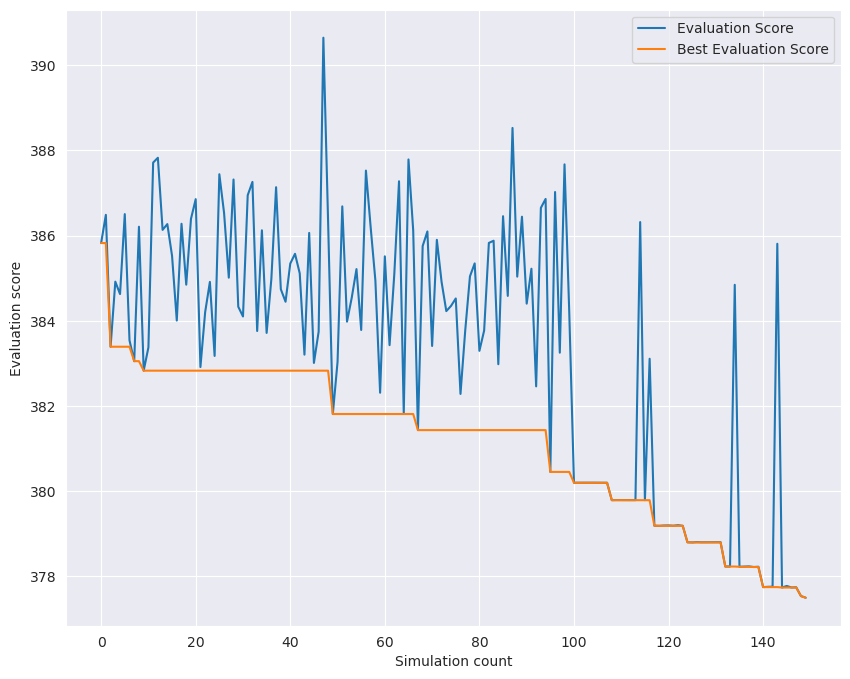

p-norm:  385.8237609863281 377.49627685546875


In [15]:
run_history = smac.runhistory

history = {'individual': [], 'score': [], 'best_score': []}

for config in run_history.get_configs():
    individual_array = np.array([config[f'x_{i}'] for i in range(60)]).reshape(1, -1)
    history['individual'].append(individual_array)
    history['score'].append(run_history.get_cost(config))
    history['best_score'].append(min(history['score']))

plt.figure(figsize=(10, 8))
plt.plot(history['score'], label='Evaluation Score')
plt.plot(history['best_score'], label='Best Evaluation Score')
plt.xlabel('Simulation count')
plt.ylabel('Evaluation score')
plt.legend()
plt.show()

print("p-norm: ", history['best_score'][0], history['best_score'][-1])
#print("angel: ", get_max_angel(history['individual'][0]),
#            get_max_angel(history['individual'][np.argmin(history['score'])]))

In [4]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from src.models import CFPNetM, DenseModel
from src.dataloaders import ImagesDataLoader, BaselineDataLoader
from src.metrics import RMSE
from src.scaler import Scaler

import tensorflow as tf


class Oracle:
    def __init__(self):
        self.scaler = Scaler()
        data_loader = ImagesDataLoader('data/train_short.csv')
        x, y = data_loader.load_data()
        x_train, x_test, y_train, y_test = data_loader.split_data(x, y, train_size=100, test_size=100)
        with tf.device('/CPU:0'):
            train_dataset = data_loader.create_dataset(x_train, y_train, batch_size=8)
            self.model = CFPNetM(name='CFPNetM',
                                 input_dim=train_dataset.element_spec[0].shape[1:],
                                 output_dim=train_dataset.element_spec[1].shape[1:],
                                 encoding="domain",
                                 positional_encoding=0,
                                 x_train=x_train)
            self.model.reload(is_mc_dropout=False, filepath="tmp/best_weights_cpfnet_m.h5")

    def simulate(self, individual):
        x = np.array(individual).reshape(1, -1)
        x = self.scaler.scale(x, col_name="gripper_force")
        with tf.device('/CPU:0'):
            y = self.model.predict(x)
        y = self.scaler.inverse_transform(y, col_name="strain_field_matrix").reshape(460, 300)
        return y


class SurrogateModel:
    def __init__(self):
        os.makedirs("tmp/sbo/", exist_ok=True)

        self.scaler = Scaler()
        self.data_loader = BaselineDataLoader('data/val_short.csv')
        self.x, self.y = self.data_loader.load_data()
        self.loss_function = 'mse'
        self.loss_metric = RMSE(name='Loss_MSE', squared=True, inverse=True)
        self.p_norm = lambda matrix: tf.norm(matrix, ord=4)

        data_loader_val = BaselineDataLoader('data/train_short.csv')
        x_val, y_val = data_loader_val.load_data()
        _, x_test, _, y_test = data_loader_val.split_data(x_val, y_val, train_size=0, test_size=100)
        with tf.device('/GPU:0'):
            self.val_dataset = data_loader_val.create_dataset(x_test, y_test, batch_size=8, shuffle=False)

    def build(self):
        with tf.device('/GPU:0'):
            self.model = DenseModel(name='Baseline',
                                    input_dim=[60],
                                    output_dim=[460 * 300])
            self.model.compile(optimizer="adam", loss=self.loss_function,
                               loss_metric=self.loss_metric, obj_function=self.p_norm)

    def train(self):
        with tf.device('/GPU:0'):
            train_dataset = self.data_loader.create_dataset(self.x, self.y, batch_size=8)
            _ = self.model.train(train_dataset, self.val_dataset,
                                 epochs=10, early_stop_patience=60, verbose=0,
                                 save_filepath="tmp/sbo/")

    def update_dataset(self, new_point):
        new_point = np.array(new_point).reshape(-1)
        self.x.loc[len(self.x)] = new_point
        y = oracle.simulate(new_point)
        path = "tmp/sbo/strain_field_" + str(len(self.y)) + ".npy"
        np.save(path, y)
        self.y.loc[len(self.y)] = path

    def predict(self, x):
        x = np.array(x).reshape(1, -1)
        x = self.scaler.scale(x, col_name="gripper_force")
        with tf.device('/GPU:0'):
            y = self.model.predict(x)
        y = self.scaler.inverse_transform(y, col_name="strain_field_matrix").reshape(-1)
        return y

In [13]:
from scipy.optimize import differential_evolution
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json

oracle = Oracle()


def objective_function(x, p=4):
    y = oracle.simulate(x).reshape(-1)
    return np.linalg.norm(y, ord=p)


history = {
    'individual': [],
    'score': [],
    'best_score': []
}

bounds = [(0.01, 1.0)] * 60

n_trials = 10

sur_model = SurrogateModel()
sur_model.build()

for trial in tqdm(range(n_trials)):
    # Train surrogate model
    sur_model.train()

    # Optimize surrogate model to find the best candidate
    init_dataset = sur_model.x.values
    result = differential_evolution(objective_function, bounds, init=init_dataset)

    # Get the real value of the best candidate from the oracle
    best_candidate = result.x
    real_value = objective_function(best_candidate)

    print('Iteration {}: Best p-norm = {}, Best angel = {}'.format(trial, real_value,
                                                                   np.max(oracle.simulate(best_candidate))))

    # Update the dataset
    sur_model.update_dataset(best_candidate)
    print('Dataset size: ', len(sur_model.x), len(sur_model.y))
    sur_model.build()

    # Save statistics
    history['individual'].append(best_candidate)
    history['score'].append(real_value)
    history['best_score'].append(min(history['score']))

with open('tmp/sbo/history.json', 'w') as f:
    json.dump(history, f)

plt.figure(figsize=(10, 8))
plt.plot(history['score'], label='Evaluation Score')
plt.plot(history['best_score'], label='Best Evaluation Score')
plt.xlabel('Simulation count')
plt.ylabel('Evaluation score')
plt.legend()
#plt.show()
plt.savefig('tmp/sbo/results.png')

print("p-norm: ", history['best_score'][0], history['best_score'][-1])
print("angel: ", np.max(oracle.simulate(history['individual'][0])),
      np.max(oracle.simulate(history['individual'][np.argmin(history['score'])])))

  0%|                                                    | 0/10 [00:00<?, ?it/s]

Iteration 0: Best p-norm = 380.40692138671875, Best angel = 42.979522705078125


 10%|████▎                                      | 1/10 [03:46<33:55, 226.16s/it]

Dataset size:  101 101


 10%|████▎                                      | 1/10 [04:15<38:23, 255.94s/it]


KeyboardInterrupt: 

## Baseline

/home/i40/eismonta/miniconda3/envs/sur_opt/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/i40/eismonta/miniconda3/envs/sur_opt/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "

  0%|                                                  | 0/5000 [01:07<?, ?it/s]

100%|███████████████████████████████████████| 5000/5000 [08:48<00:00,  9.51it/s]
5001it [08:48,  9.42it/s]                                                       
5002it [08:49,  9.38it/s]
5003it [08:49,  9.39it/s]
5004it [08:49,  9.43it/s]
5005it [08:49,  9.49it/s]
500

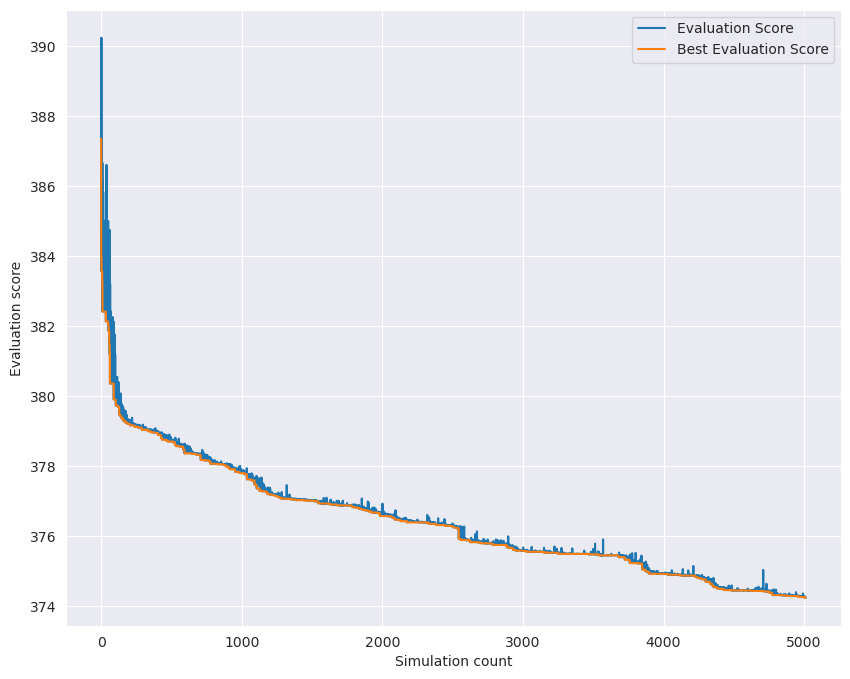

p-norm:  387.35995 374.2383
angel:  44.271076 42.477333


In [14]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import random
import numpy as np
import pandas as pd
from deap import base, creator, tools, algorithms
import tensorflow as tf
from matplotlib import pyplot as plt
from tqdm import tqdm

from src.models import CFPNetM
from src.dataloaders import ImagesDataLoader
from src.scaler import Scaler

data_loader = ImagesDataLoader('data/train_short.csv')
x, y = data_loader.load_data()
x_train, x_test, y_train, y_test = data_loader.split_data(x, y, train_size=100, test_size=100)
train_dataset = data_loader.create_dataset(x_train, y_train, batch_size=8)
model = CFPNetM(name='CFPNetM',
                input_dim=train_dataset.element_spec[0].shape[1:],
                output_dim=train_dataset.element_spec[1].shape[1:],
                encoding="domain",
                positional_encoding=0,
                x_train=x_train)
model.reload(is_mc_dropout=False, filepath="tmp/best_weights_cpfnet_m.h5")

scaler = Scaler()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

BOUND_LOW, BOUND_UP = 0.01, 1.0  # adjusting the range
NDIM = 60  # dimensions

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, BOUND_LOW, BOUND_UP)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=NDIM)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


def eval_pnorm(individual, p=4):
    global eval_count
    eval_count += 1
    x = np.array(individual).reshape(1, -1)
    x = scaler.scale(x, col_name="gripper_force")
    y = model.predict(x)
    y = scaler.inverse_transform(y, col_name="strain_field_matrix").reshape(-1)
    return np.linalg.norm(y, ord=p),


def get_max_angel(individual):
    x = np.array(individual).reshape(1, -1)
    x = scaler.scale(x, col_name="gripper_force")
    y = model.predict(x)
    y = scaler.inverse_transform(y, col_name="strain_field_matrix").reshape(-1)
    return np.max(y)


toolbox.register("evaluate", eval_pnorm)
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=0.08)
toolbox.register("select", tools.selTournament, tournsize=3)

history = {
    'individual': [],
    'score': [],
    'best_score': []
}

eval_count = 0


def main(n_trials):
    random.seed(42)

    # creating population
    pop = toolbox.population(n=14)

    pbar = tqdm(total=n_trials)

    # Algorithm loop
    while eval_count < n_trials:
        offspring = algorithms.varAnd(pop, toolbox, cxpb=0.8, mutpb=0.08)
        fits = toolbox.map(toolbox.evaluate, offspring)

        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
            history['individual'].append(ind)
            history['score'].append(fit[0])
            history['best_score'].append(min(history['score']))
            pbar.update(1)
            if eval_count >= n_trials:
                break

        pop = toolbox.select(offspring, k=len(pop))

    pbar.close()
    return pop, history


if __name__ == "__main__":
    pop, history = main(n_trials=5000)

    # Plotting the evaluation score
plt.figure(figsize=(10, 8))
plt.plot(history['score'], label='Evaluation Score')
plt.plot(history['best_score'], label='Best Evaluation Score')
plt.xlabel('Simulation count')
plt.ylabel('Evaluation score')
plt.legend()
plt.show()

print("p-norm: ", history['best_score'][0], history['best_score'][-1])
print("angel: ", get_max_angel(history['individual'][0]),
      get_max_angel(history['individual'][np.argmin(history['score'])]))

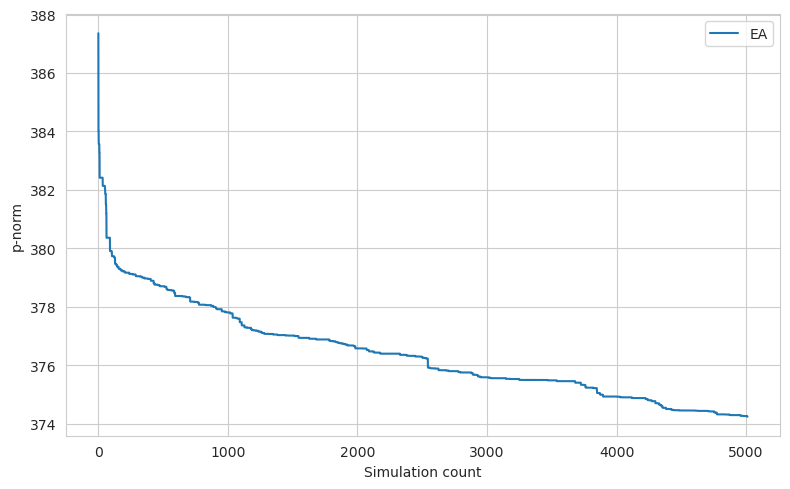

In [18]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 5))

sns.lineplot(history['best_score'], label='EA')
ax.set_xlabel('Simulation count')
ax.set_ylabel('p-norm')

plt.tight_layout()
plt.show()

fig.savefig('ea.png', dpi=140)

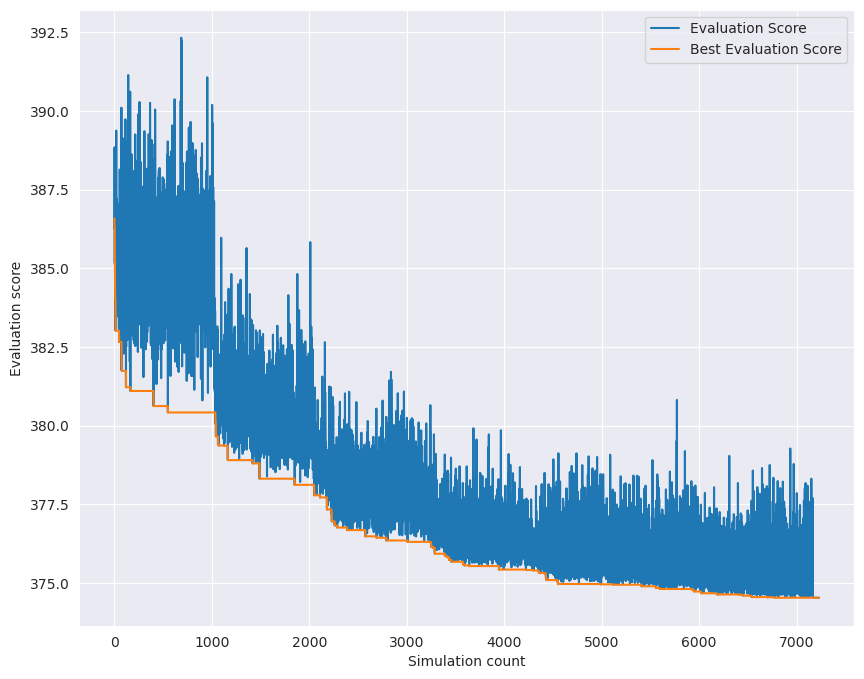

p-norm:  386.58362 374.53644
angel:  47.26204 42.283733
7229


In [2]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

from src.models import CFPNetM
from src.dataloaders import ImagesDataLoader
from src.scaler import Scaler

# Data loading
data_loader = ImagesDataLoader('data/train_short.csv')
x, y = data_loader.load_data()
x_train, x_test, y_train, y_test = data_loader.split_data(x, y, train_size=100, test_size=100)
train_dataset = data_loader.create_dataset(x_train, y_train, batch_size=8)

# Model initialization
model = CFPNetM(name='CFPNetM',
                input_dim=train_dataset.element_spec[0].shape[1:],
                output_dim=train_dataset.element_spec[1].shape[1:],
                encoding="domain",
                positional_encoding=0,
                x_train=x_train)
model.reload(is_mc_dropout=False, filepath="tmp/best_weights_cpfnet_m.h5")

# Scaler initialization
scaler = Scaler()

# Bounds and dimensions
BOUND_LOW, BOUND_UP = 0.01, 1.0
NDIM = 60
bounds = [(BOUND_LOW, BOUND_UP)] * NDIM

# Counter for evaluation count
eval_count = 0


# Modified evaluation function to keep track of evaluation count
def eval_pnorm_with_tracking(individual, p=4):
    global eval_count
    eval_count += 1
    fitness = eval_pnorm(individual, p)
    history['individual'].append(individual)
    history['score'].append(fitness[0])
    history['best_score'].append(min(history['score']))
    return fitness


# Evaluation function
def eval_pnorm(individual, p=4):
    x = np.array(individual).reshape(1, -1)
    x = scaler.scale(x, col_name="gripper_force")
    y = model.predict(x)
    y = scaler.inverse_transform(y, col_name="strain_field_matrix").reshape(-1)
    return np.linalg.norm(y, ord=p),


def get_max_angel(individual):
    x = np.array(individual).reshape(1, -1)
    x = scaler.scale(x, col_name="gripper_force")
    y = model.predict(x)
    y = scaler.inverse_transform(y, col_name="strain_field_matrix").reshape(-1)
    return np.max(y)


# History object to keep track of intermediate results
history = {
    'individual': [],
    'score': [],
    'best_score': []
}

# Differential Evolution with n_trials limitation
n_trials = 5000
popsize = 14
maxiter = round(n_trials / (popsize * NDIM) - 1)

# Differential Evolution
result = differential_evolution(eval_pnorm_with_tracking, bounds, popsize=popsize, mutation=0.08, recombination=0.8,
                                maxiter=maxiter, init="sobol", tol=0.0, atol=0.0, disp=False, seed=42)

# Extracting results
final_population = result.x
final_score = result.fun

# Adding final results to history
history['individual'].append(final_population)
history['score'].append(final_score)
history['best_score'].append(min(history['score']))

# Plotting the evaluation score
plt.figure(figsize=(10, 8))
plt.plot(history['score'], label='Evaluation Score')
plt.plot(history['best_score'], label='Best Evaluation Score')
plt.xlabel('Simulation count')
plt.ylabel('Evaluation score')
plt.legend()
plt.show()

print("p-norm: ", history['best_score'][0], history['best_score'][-1])
print("angel: ", get_max_angel(history['individual'][0]),
      get_max_angel(history['individual'][np.argmin(history['score'])]))
print(eval_count)

# Analysis Data

In [1]:
import pandas as pd
from tqdm import tqdm
import os
import tensorflow as tf
import numpy as np

df_train = pd.read_csv('data_v2/doubledome/train_short.csv').filter(regex='gripper_force|strain_field_matrix_path')
df_val = pd.read_csv('data_v2/doubledome/val_short.csv').filter(regex='gripper_force|strain_field_matrix_path')

df_train_val = pd.concat([df_train, df_val], ignore_index=True)

path = os.path.dirname("__file__")
data_path = os.path.join(path, "data_v2")
y_train = np.load(os.path.join(path, "Austausch_IPD_Optimierung", "XY-Simulationsdaten_train", "y_vals.npy"))
y_val = np.load(os.path.join(path, "Austausch_IPD_Optimierung", "XY-Simulationsdaten_val", "y_vals.npy"))
y_train_val = np.concatenate([y_train, y_val], axis=0)

norms, max_vals = [], []
for path in tqdm(df_train_val['strain_field_matrix_path']):
    path = path.replace('data', 'data_v2')
    matrix = np.load(path)
    norm = tf.norm(matrix, ord=4).numpy()
    max_val = np.max(matrix)
    norms.append(norm)
    max_vals.append(max_val)

norms_train, max_vals_train = [], []
for y in tqdm(y_train):
    norm = tf.norm(y, ord=4).numpy()
    max_val = np.max(y)
    norms_train.append(norm)
    max_vals_train.append(max_val)

norms_val, max_vals_val = [], []
for y in tqdm(y_val):
    norm = tf.norm(y, ord=4).numpy()
    max_val = np.max(y)
    norms_val.append(norm)
    max_vals_val.append(max_val)

2023-08-02 16:14:23.249124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 16:14:24.066962: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1232.04it/s]


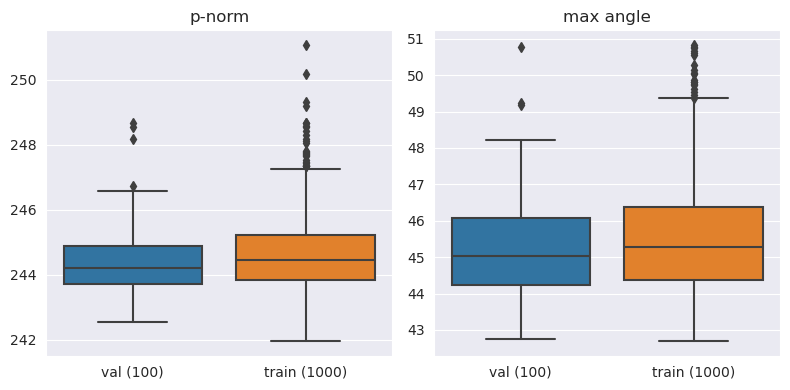

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

p_norms = np.concatenate((norms_val, norms_train))
p_norms_labels = np.array(["val (100)"] * len(norms_val) + ["train (1000)"] * len(norms_train))
p_norms_dict = {"Type": p_norms_labels, "Value": p_norms}

max_vals = np.concatenate((max_vals_val, max_vals_train))
max_vals_labels = np.array(["val (100)"] * len(max_vals_val) + ["train (1000)"] * len(max_vals_train))
max_vals_dict = {"Type": max_vals_labels, "Value": max_vals}

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

sns.boxplot(x="Type", y="Value", data=p_norms_dict, ax=axes[0])
axes[0].set_title("p-norm")
sns.boxplot(x="Type", y="Value", data=max_vals_dict, ax=axes[1])
axes[1].set_title("max angle")

plt.tight_layout()
plt.show()

fig.savefig('p_norm.png', dpi=140)

In [3]:
min(max_vals_val), min(max_vals_train)

(42.75, 42.682579040527294)